In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time

from xgboost import XGBRegressor

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, root_mean_squared_error, mean_squared_error, mean_absolute_percentage_error, r2_score

In [1]:
import pandas as pd

df = pd.read_excel('../Data/EURUSD.xlsx')
df.head()

,Date,Close
0,2022-05-15,1.03980
1,2022-05-16,1.04390
2,2022-05-17,1.05487
3,2022-05-18,1.04729
4,2022-05-19,1.05795


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001 entries, 0 to 1000
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    1001 non-null   datetime64[ns]
 1   Close   1001 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 15.8 KB


In [56]:
df.set_index('Date', inplace=True)

In [57]:
df.isnull().sum()

,0
Close,0


In [58]:
df['Close_H-1'] = df['Close'].shift(1)
df['Close_H-2'] = df['Close'].shift(2)
df['Close_H-3'] = df['Close'].shift(3)

df.dropna(inplace=True)

print(f"Data setelah feature engineering dan pembersihan. Jumlah baris: {len(df)}")
df.head()

Data setelah feature engineering dan pembersihan. Jumlah baris: 998


,Close,Close_H-1,Close_H-2,Close_H-3
Date,,,,
2022-05-18,1.04729,1.05487,1.04390,1.03980
2022-05-19,1.05795,1.04729,1.05487,1.04390
2022-05-20,1.05610,1.05795,1.04729,1.05487
2022-05-22,1.05689,1.05610,1.05795,1.04729
2022-05-23,1.06837,1.05689,1.05610,1.05795


In [59]:
X = df[['Close_H-1', 'Close_H-2', 'Close_H-3']]
y = df['Close']

XGBoost 70/30

In [60]:
train_size_70 = int(len(X) * 0.7)

X_train_70, X_test_70 = X[:train_size_70], X[train_size_70:]
y_train_70, y_test_70 = y[:train_size_70], y[train_size_70:]
print(f"Pembagian data 70/30: {len(X_train_70)} latih / {len(X_test_70)} uji")

Pembagian data 70/30: 698 latih / 300 uji


In [61]:
print("\nMemulai pelatihan model XGBoost 70/30")
start = time.time()
xgbr = XGBRegressor()
xgbr.fit(X_train_70, y_train_70)
end = time.time()


Memulai pelatihan model XGBoost 70/30


In [62]:
print(f"Pelatihan XGBoost 70/30 selesai dalam {end - start:.4f} detik.")

Pelatihan XGBoost 70/30 selesai dalam 0.0509 detik.


In [63]:
y_pred_70 = xgbr.predict(X_test_70)

rmse = root_mean_squared_error(y_test_70, y_pred_70)
mae = mean_absolute_error(y_test_70, y_pred_70)
mape = (mean_absolute_percentage_error(y_test_70, y_pred_70)) * 100
r2 = r2_score(y_test_70, y_pred_70)

print("\nHasil evaluasi model XGBoost 70/30:")
print(f"RMSE : {rmse:.4f}")
print(f"MAE  : {mae:.4f}")
print(f"MAPE : {mape:.2f}%")
print(f"R²   : {r2:.4f}")


Hasil evaluasi model XGBoost 70/30:
RMSE : 0.0183
MAE  : 0.0113
MAPE : 1.00%
R²   : 0.8237


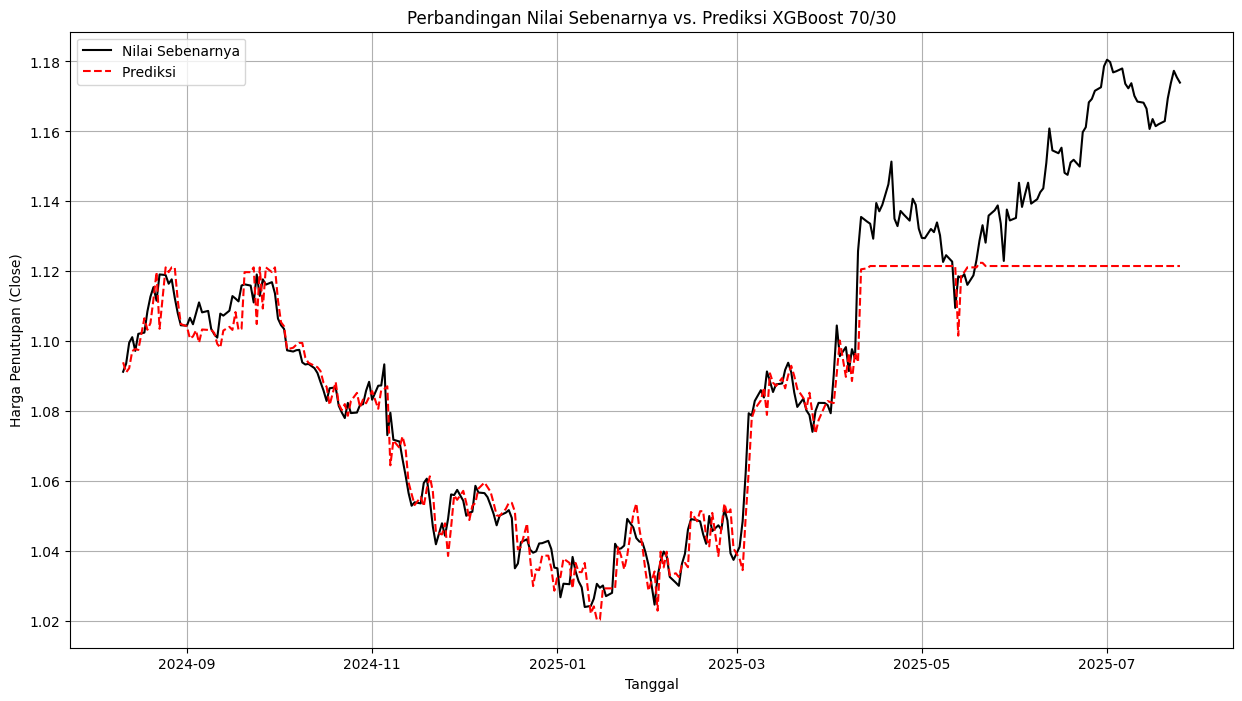

In [64]:
plt.figure(figsize=(15, 8))
test_data = pd.DataFrame({'Nilai Sebenarnya': y_test_70, 'Prediksi XGBoost': y_pred_70}).sort_index()
plt.plot(test_data['Nilai Sebenarnya'], label='Nilai Sebenarnya', color='black')
plt.plot(test_data['Prediksi XGBoost'], label='Prediksi ', color='red', linestyle='--')
plt.title('Perbandingan Nilai Sebenarnya vs. Prediksi XGBoost 70/30')
plt.xlabel('Tanggal')
plt.ylabel('Harga Penutupan (Close)')
plt.legend()
plt.grid(True)
plt.show()

XGBoost 80/20

In [65]:
train_size_80 = int(len(X) * 0.8)

X_train_80, X_test_80 = X[:train_size_80], X[train_size_80:]
y_train_80, y_test_80 = y[:train_size_80], y[train_size_80:]
print(f"Pembagian data 80/20: {len(X_train_80)} latih / {len(X_test_80)} uji")

Pembagian data 80/20: 798 latih / 200 uji


In [66]:
print("\nMemulai pelatihan model XGBoost 80/20")
start = time.time()
xgbr = XGBRegressor()
xgbr.fit(X_train_80, y_train_80)
end = time.time()
print(f"Pelatihan XGBoost 80/20 selesai dalam {end - start:.4f} detik.")


Memulai pelatihan model XGBoost 80/20
Pelatihan XGBoost 80/20 selesai dalam 0.0397 detik.


In [67]:
print(f"Pelatihan XGBoost 80/20 selesai dalam {end - start:.4f} detik.")

Pelatihan XGBoost 80/20 selesai dalam 0.0397 detik.


In [68]:
y_pred_80 = xgbr.predict(X_test_80)

rmse = root_mean_squared_error(y_test_80, y_pred_80)
mae = mean_absolute_error(y_test_80, y_pred_80)
mape = (mean_absolute_percentage_error(y_test_80, y_pred_80)) * 100
r2 = r2_score(y_test_80, y_pred_80)

print("\nHasil evaluasi model CatBoost 70/30:")
print(f"RMSE : {rmse:.4f}")
print(f"MAE  : {mae:.4f}")
print(f"MAPE : {mape:.2f}%")
print(f"R²   : {r2:.4f}")


Hasil evaluasi model CatBoost 70/30:
RMSE : 0.0218
MAE  : 0.0145
MAPE : 1.27%
R²   : 0.8157


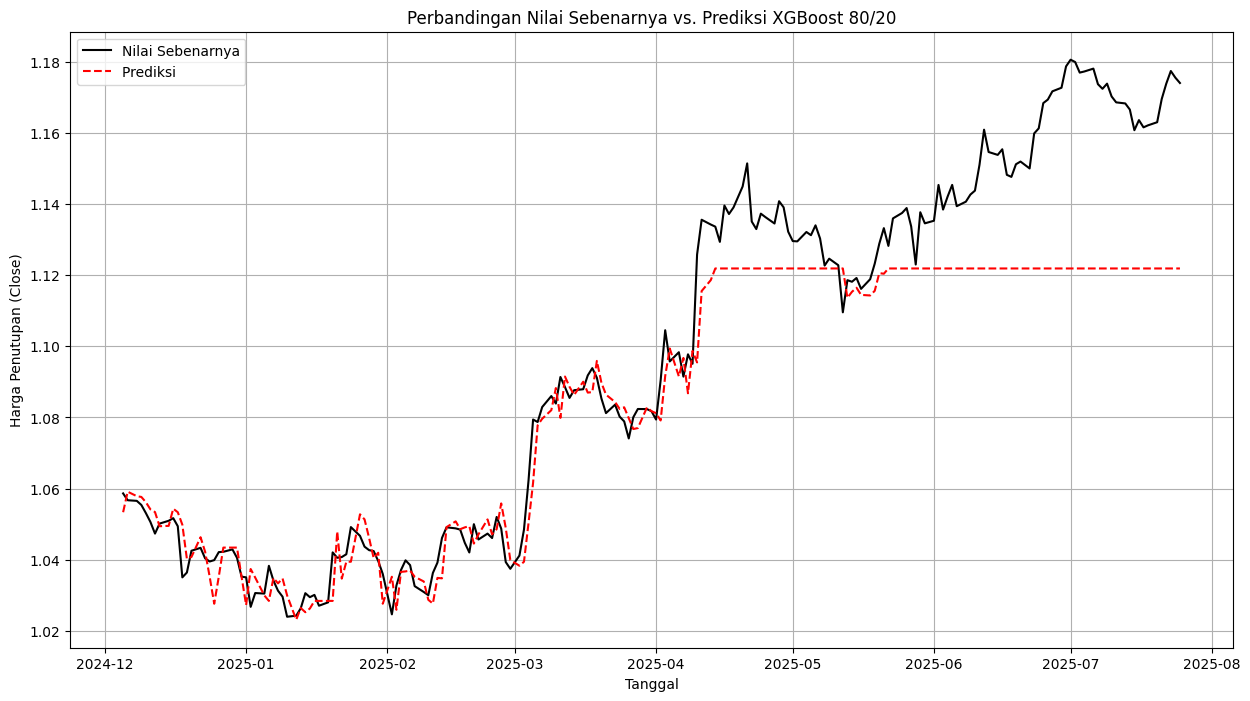

In [69]:
plt.figure(figsize=(15, 8))
test_data = pd.DataFrame({'Nilai Sebenarnya': y_test_80, 'Prediksi XGBoost': y_pred_80}).sort_index()
plt.plot(test_data['Nilai Sebenarnya'], label='Nilai Sebenarnya', color='black')
plt.plot(test_data['Prediksi XGBoost'], label='Prediksi ', color='red', linestyle='--')
plt.title('Perbandingan Nilai Sebenarnya vs. Prediksi XGBoost 80/20')
plt.xlabel('Tanggal')
plt.ylabel('Harga Penutupan (Close)')
plt.legend()
plt.grid(True)
plt.show()